In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [2]:
data = pd.read_csv("../data/AdSmartABdata.csv")

In [3]:
data.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   object
 2   date         8077 non-null   object
 3   hour         8077 non-null   int64 
 4   device_make  8077 non-null   object
 5   platform_os  8077 non-null   int64 
 6   browser      8077 non-null   object
 7   yes          8077 non-null   int64 
 8   no           8077 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 568.0+ KB


In [5]:
# the date column needs to be converted in datetime
data['date'] = pd.to_datetime(data['date'])

In [6]:
data.isnull().sum()

auction_id     0
experiment     0
date           0
hour           0
device_make    0
platform_os    0
browser        0
yes            0
no             0
dtype: int64

In [7]:
# Dividing the datasets according to the exposed/control group
users_c = data[data['experiment']=='control']
users_e = data[data['experiment']=='exposed']

In [8]:
users_c_os = users_c['platform_os'].nunique()
users_e_os = users_e['platform_os'].nunique()

users_c_device = users_c['device_make'].nunique()
users_e_device = users_e['device_make'].nunique()

users_c_browser = users_c['browser'].nunique()
users_e_browser = users_e['browser'].nunique()

print('number of unique platform os in control group:', users_c_os)
print('number of unique platform os in exposed group:', users_e_os)
print('number of unique device make in control group:', users_c_device)
print('number of unique device make in exposed group:', users_e_device)
print('number of unique browser in control group:', users_c_browser)
print('number of unique browser in exposed group:', users_e_browser)

number of unique platform os in control group: 2
number of unique platform os in exposed group: 3
number of unique device make in control group: 169
number of unique device make in exposed group: 218
number of unique browser in control group: 12
number of unique browser in exposed group: 12


Text(0.5, 1.0, 'Number of users per platform os for each group')

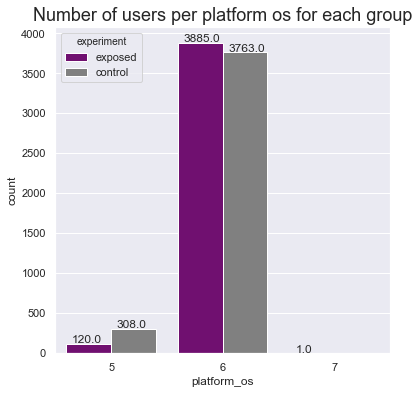

In [16]:
plt.figure(figsize=(6,6))
sns.set(style="darkgrid")
ax = sns.countplot(x="platform_os", hue = "experiment", data = data, palette=["purple", "gray"])
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+5))
plt.title("Number of users per platform os for each group", fontsize=18)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

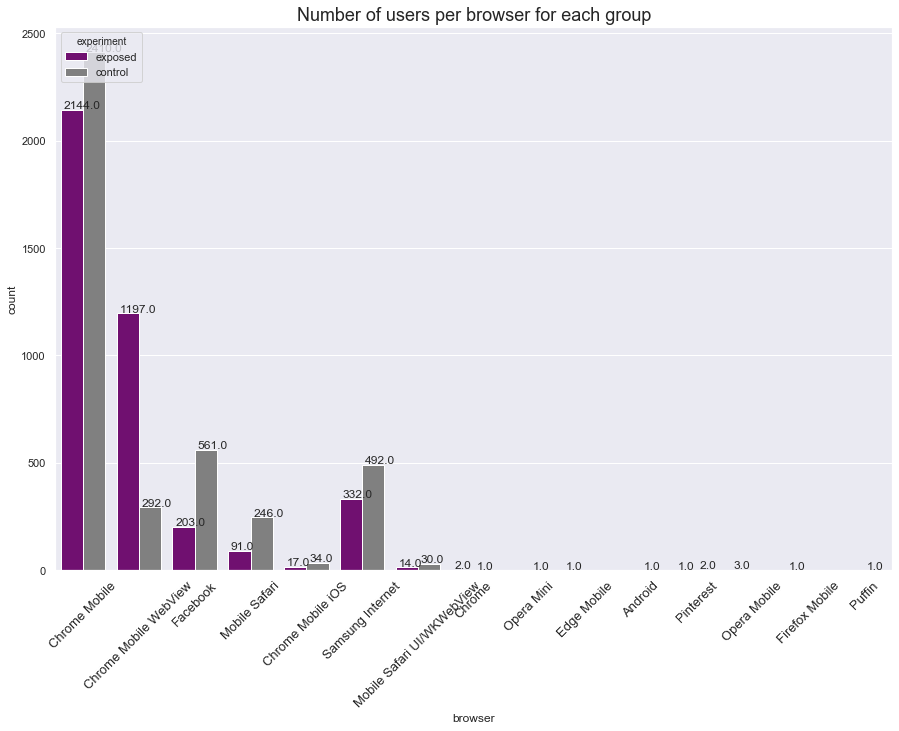

In [18]:
plt.figure(figsize=(15,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="browser", hue = "experiment", data = data, palette=["purple", "gray"])
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+5))
plt.title("Number of users per browser for each group", fontsize=18)
plt.xticks(rotation=45, fontsize=13)

'plt.figure(figsize=(15,10))\nsns.set(style="darkgrid")\nax = sns.countplot(x="device_make", hue = "experiment", data = data, palette=["purple", "gray"])\nfor p in ax.patches:\n        ax.annotate(\'{:.1f}\'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+5))\nplt.title("Number of users per browser for each group", fontsize=18)\nplt.xticks(rotation=45)'

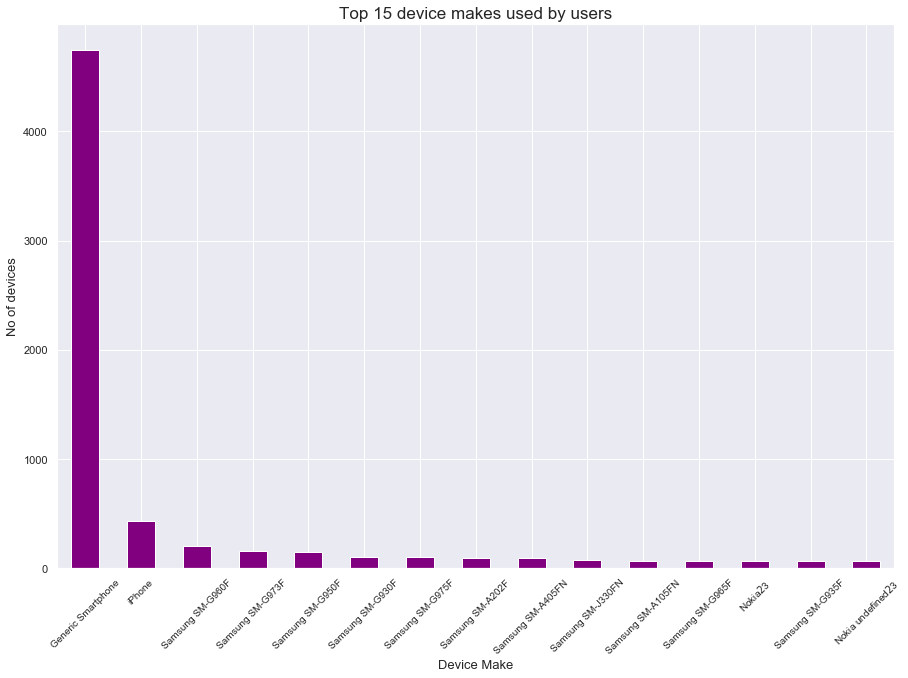

In [28]:

fig, ax = plt.subplots(1,1, figsize=(15, 10))
sns.set(style="darkgrid")
data.device_make.value_counts().head(15).plot(kind='bar', color="purple")
plt.title('Top 15 device makes used by users',fontsize=17)
plt.xticks(rotation=45,fontsize=10)
plt.ylabel('No of devices',fontsize=13)
plt.xlabel('Device Make',fontsize=13)

"""plt.figure(figsize=(15,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="device_make", hue = "experiment", data = data, palette=["purple", "gray"])
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+5))
plt.title("Number of users per browser for each group", fontsize=18)
plt.xticks(rotation=45)"""

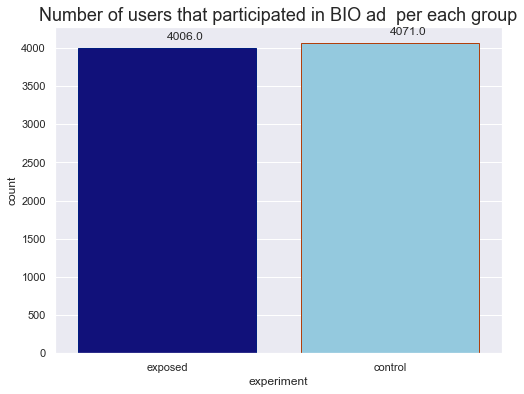

In [11]:
plt.figure(figsize=(8,6))
sns.set(style="darkgrid")
ax = sns.countplot(x = 'experiment', data = data[~((data['yes']!=0) & (data['no']!=0))],edgecolor=sns.color_palette("dark", 10),
                    palette=["darkblue", "skyblue"])
plt.title('Number of users that participated in BIO ad  per each group', fontsize=18)
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()+100))

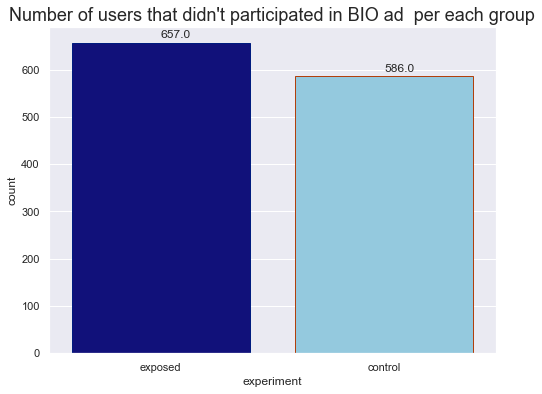

In [12]:
plt.figure(figsize=(8,6))
sns.set(style="darkgrid")
ax = sns.countplot(x = 'experiment', data = data[~((data['yes']==0) & (data['no']==0))], palette=["darkblue", "skyblue"],
                   edgecolor=sns.color_palette("dark", 10))
plt.title("Number of users that didn't participated in BIO ad  per each group", fontsize=18)
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()+10))

In [13]:
# Adding the day column on my datasets
data['day'] = data['date'].dt.day
users_c['day'] = users_c['date'].dt.day
users_e['day'] = users_e['date'].dt.day

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'Number of users that participated on a daily basis')

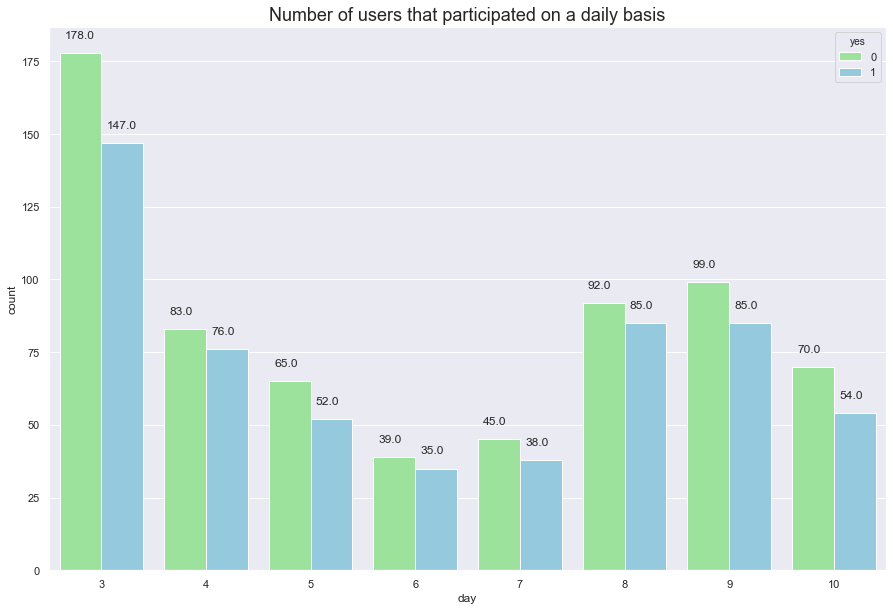

In [14]:
plt.figure(figsize=(15,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="day", data = data[~((data['yes']==0) & (data['no']==0))], hue='yes', palette=["lightgreen", "skyblue"])
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+5))
plt.title("Number of users that participated on a daily basis", fontsize=18)